In [1]:
# QUESTION 3
# Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any 
# particular characteristic or characteristic of the Houses?

# CONTEXT:
# a. The Q1  answer was "HEAT/HOT WATER" plus "HEAT" merged in a unique category named "HEAT/HOT WATER"

# b. According to the exercise instructions I should, use the 311 dataset and also I need to read back the PLUTO 
#    dataset for the borough identified as the answer in Q2 (In my case, I found a DBSCAN cluster which includes the
#    Bronx south (65,7%) and the  Manhattan north (33.4%), so I´ll analize the Bronx borough)

# c. To answer Q3, I should identify if exist an obvious relationship between the "HEAT/HOT WATER" complaints and any
#    particular characteristic or characteristic of the Houses located in the area identified in Q2 (Bronx borough 
#    specifically in my case). So, to do that I think there is several possible approaches. Two of them would be:

#    c.1. Computing the % frequecy of complaints per each feature selected from PLUTOs dataset and verify if the 
#         complaints tend to concentrate over an specific interval or range. For example, suppose that 70% of the
#         complaints come from houses built before 1950. In this case it could be assumed that there is an obvious 
#         relationship between "complaints" and "houses antiquity" or, in other words, according to this hypothetical
#         result, if a house is old, then it is more likely that it registers failures for the concept of "HEAT /
#         HOT WATER". In the same way with all the PLUTOs features.

#         To make this type of analysis, the measures of central tendency (average), dispersion (standard deviation) and
#         position (percentiles) are very useful, since they allow to identify "where" and "how much" complaints data is 
#         concentrated. On this basis, it is very useful to calculate the "Coefficient of Variation (1)", which is a 
#         standardized indicator that allows comparing the dispersion levels of the data between the different variables
#         analyzed. From this indicator it is possible to distinguish in which features the complaints show a more 
#         homgeneous behavior.

#         I must clarify that to apply this method, I will calculate the frequency of "complaints", not the frequency of 
#         "houses with complaints". In this way, the characteristics of the houses with more complaints will have more 
#         weight than the characteristics of the houses with fewer complaints.

#    c.2. Computing the linear relationship (correlation coeff) between the number of complaints per each PLUTOs data set
#         row and each feature of this data set. The features with higher correlation would be selected as the features
#         with an obvious relationship with the complaint.

# Notes:
# (1) From Wikipedia:
#       "In probability theory and statistics, the coefficient of variation (CV), also known as relative standard  
#       deviation (RSD), is a standardized measure of dispersion of a probability distribution or frequency distribution. 
#       It is often expressed as a percentage, and is defined as the ratio of the standard deviation..."

#     CV=standard deviation / mean and %CV=100*(standard deviation / mean) 

# 0.0. DOWNLOADING COMPLAINTS RAW DATA

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
mpl.style.use("ggplot")
%matplotlib inline

import types
from botocore.client import Config
import ibm_boto3

client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='<**REPLACE_WITH_YOUR_IBM_API_KEY_ID**>',
ibm_auth_endpoint='https://iam.bluemix.net/oidc/token',
config=Config(signature_version='oauth'),
endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

bucket = '<**REPLACE_WITH_YOUR_BUCKET_ID**>'

client_cred.download_file(Bucket=bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

DF = pd.read_pickle('./df_raw_local.pkl')



In [2]:
# 0.1. STANDARIZING COMPLAINT TYPE -HEATING- AND -HEAT/HOT WATER- AS -HEAT/HOT WATER- AND SELECTING -HEAT/HOT WATER- FROM BRONX BOROUGH
#DF.shape

DF["complaint_type"]=np.where(DF["complaint_type"]=="HEATING","HEAT/HOT WATER",DF["complaint_type"])
DF01=DF[DF["complaint_type"]=="HEAT/HOT WATER"]
DF02=DF01[DF01["borough"]=="BRONX"]
DF03=DF02.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

DF03.shape #describe(include="all")


(559769, 14)

In [3]:
# 0.3. DOWNLOADING PLUTOs BRONX RAW DATA

# from botocore.client import Config
# import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_747c380eb4764254ba9712f26ecc6625 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WzwkudenYu_9dbF1Xelroe_h7nJF7Dx8zLUnE_ChTPPu',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_747c380eb4764254ba9712f26ecc6625.get_object(Bucket='edx1-donotdelete-pr-qhdey5e4onahhj',Key='ABX.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.shape # head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(89854, 87)

In [4]:
# 0.4. PRELIMINAR PREPROCESSING OVER RAW DATA 
# 0.4.1. Selecting interest features

df_pluto01=df_data_1[['Lot','ZipCode','Address','LotArea','BldgArea','ResArea','OfficeArea','RetailArea','NumBldgs','NumFloors','UnitsRes','LotDepth',
                   'BldgDepth','YearBuilt','YearAlter1','BuiltFAR','ResidFAR','CommFAR','FacilFAR']]
df_pluto01.dtypes #head()


Lot             int64
ZipCode       float64
Address        object
LotArea         int64
BldgArea        int64
ResArea         int64
OfficeArea      int64
RetailArea      int64
NumBldgs        int64
NumFloors     float64
UnitsRes        int64
LotDepth      float64
BldgDepth     float64
YearBuilt       int64
YearAlter1      int64
BuiltFAR      float64
ResidFAR      float64
CommFAR       float64
FacilFAR      float64
dtype: object

In [5]:
# 0.4.2. Dropping PLUTOs duplicated rows:
    
prepluto1=df_pluto01.groupby(["Address"],as_index=False).max() 
print("Rows deleted by grouping by: ",df_pluto01.shape[0]-prepluto1.shape[0]," rows")
# Note:
# Features type of "lot" and "ZipCode" are "int" and "float64", which must be unique for each "Address" so, grouping by "max()" criteria must return the corresponding 
# "lot" and "ZipCode" for each address

# 0.2. Dropping PLUTOs null and "0" values rows:
    
prepluto2=prepluto1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print("Rows deleted by null values: ",prepluto1.shape[0]-prepluto2.shape[0]," rows")
DFPLUTO=prepluto2[prepluto2["YearBuilt"]>0]
print('Rows deleted by "YearBuilt" null values: ',prepluto2.shape[0]-DFPLUTO.shape[0],' rows')
print('Total Rows deleted: ',df_pluto01.shape[0]-DFPLUTO.shape[0],' rows')
print('Total Rows PLUTOs Bronx data set: ',DFPLUTO.shape[0],' rows')

# DFPLUTO.describe(include="all")


Rows deleted by grouping by:  2837  rows
Rows deleted by null values:  23  rows
Rows deleted by "YearBuilt" null values:  3622  rows
Total Rows deleted:  6482  rows
Total Rows PLUTOs Bronx data set:  83372  rows


In [6]:
DFPLUTO.head()

,Address,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,UnitsRes,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,1 ALDEN PARK,132,10465.0,16500,694,694,0,0,18,1.0,14,178.00,41.0,1930,0,0.06,0.90,0.0,2.0
1,1 ANGELAS PLACE,7504,10465.0,34860,60406,60406,0,0,17,2.0,27,364.93,46.5,2004,0,1.73,0.60,0.5,1.0
2,1 BANES COURT,15,10473.0,2262,2420,2420,0,0,1,3.0,2,75.00,40.0,2002,0,1.07,0.60,0.0,1.0
3,1 BEDFORD PARK BLVD,1,10468.0,7700,5000,0,0,5000,1,1.0,0,100.00,100.0,1928,0,0.65,6.02,0.0,6.5
4,1 BLACKSTONE PLACE,966,10471.0,13344,3670,3670,0,0,1,2.0,1,132.25,35.0,1920,0,0.28,0.50,0.0,1.0


In [7]:
# 1. MERGING BRONX COMPLAINTS AND PLUTOs DATA SETS:
# 1.1. Include and summarize PLUTOs features in complaints dataset using "incident_address" and "Address" as common merging feature:

z00=pd.merge(DF03,DFPLUTO,left_on="incident_address",right_on="Address",how="inner")
summary01=z00.describe(include="all") #shape #head()
summary01

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,...,NumFloors,UnitsRes,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
count,447291,4.472910e+05,447291,447291.000000,447291,447291,447291,447291,447291,447291.000000,...,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000
unique,202189,NaN,1,NaN,16679,903,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-08 00:00:00,NaN,HEAT/HOT WATER,NaN,3810 BAILEY AVENUE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1490,NaN,447291,NaN,7088,29797,447291,447291,447291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-15 01:04:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.101938e+07,NaN,10460.860391,NaN,NaN,NaN,NaN,NaN,40.851339,...,5.452930,54.586341,117.445932,91.413353,1932.603345,515.059346,3.724063,3.380073,0.083338,4.647446
std,NaN,6.179540e+06,NaN,6.523463,NaN,NaN,NaN,NaN,NaN,0.021453,...,2.356324,69.500204,51.832254,37.516496,21.439590,872.237979,2.402760,1.564065,0.504576,1.407764
min,NaN,1.572504e+07,NaN,10451.000000,NaN,NaN,NaN,NaN,NaN,40.801611,...,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.655639e+07,NaN,10456.000000,NaN,NaN,NaN,NaN,NaN,40.833167,...,5.000000,22.000000,100.000000,75.000000,1924.000000,0.000000,3.010000,2.430000,0.000000,4.800000


In [8]:
print("The -YearBuilt- 75th percentile is: ",int(summary01.iloc[11,27]),
      " which means than 75% complaints come from places builted at least ",2018-int(summary01.iloc[11,27])," years ago")

The -YearBuilt- 75th percentile is:  1931  which means than 75% complaints come from places builted at least  87  years ago


In [9]:
# 1.2. Creating the features: 
#    a. age_built = 2018-YearBuilt
#    b. year_last_mod = max(YearBuilt,YearAlter1)
#    c. age_last_mod = 2018-year_last_mod
#
z00["age_built"]=2018-z00.YearBuilt
z00["year_last_mod"]=z00[['YearBuilt','YearAlter1']].max(axis=1)
z00["age_last_mod"]=2018-z00.year_last_mod
summary02=z00.describe(include="all")
summary02


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,borough,latitude,...,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,age_built,year_last_mod,age_last_mod
count,447291,4.472910e+05,447291,447291.000000,447291,447291,447291,447291,447291,447291.000000,...,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000,447291.000000
unique,202189,NaN,1,NaN,16679,903,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-08 00:00:00,NaN,HEAT/HOT WATER,NaN,3810 BAILEY AVENUE,GRAND CONCOURSE,ADDRESS,BRONX,BRONX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1490,NaN,447291,NaN,7088,29797,447291,447291,447291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-15 01:04:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.101938e+07,NaN,10460.860391,NaN,NaN,NaN,NaN,NaN,40.851339,...,91.413353,1932.603345,515.059346,3.724063,3.380073,0.083338,4.647446,85.396655,1949.561578,68.438422
std,NaN,6.179540e+06,NaN,6.523463,NaN,NaN,NaN,NaN,NaN,0.021453,...,37.516496,21.439590,872.237979,2.402760,1.564065,0.504576,1.407764,21.439590,32.656754,32.656754
min,NaN,1.572504e+07,NaN,10451.000000,NaN,NaN,NaN,NaN,NaN,40.801611,...,0.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1800.000000,1.000000
25%,NaN,2.655639e+07,NaN,10456.000000,NaN,NaN,NaN,NaN,NaN,40.833167,...,75.000000,1924.000000,0.000000,3.010000,2.430000,0.000000,4.800000,87.000000,1926.000000,34.000000


In [10]:
# 1.3. Computing the variation coefficient per each feature

z01=summary02.iloc[6:8,17:35].transpose()    #columns #iloc[1,2]
z01["cv"]=z01["std"]/z01["mean"]
z02=z01.sort_values(by="cv",ascending=True)
z02.head(10)  

,mean,std,cv
YearBuilt,1932.603345,21.439590,0.011094
year_last_mod,1949.561578,32.656754,0.016751
age_built,85.396655,21.439590,0.251059
FacilFAR,4.647446,1.407764,0.302911
BldgDepth,91.413353,37.516496,0.410405
NumFloors,5.452930,2.356324,0.432121
LotDepth,117.445932,51.832254,0.441329
ResidFAR,3.380073,1.564065,0.462731
BuiltFAR,3.724063,2.402760,0.645198
NumBldgs,1.111308,0.760401,0.684240


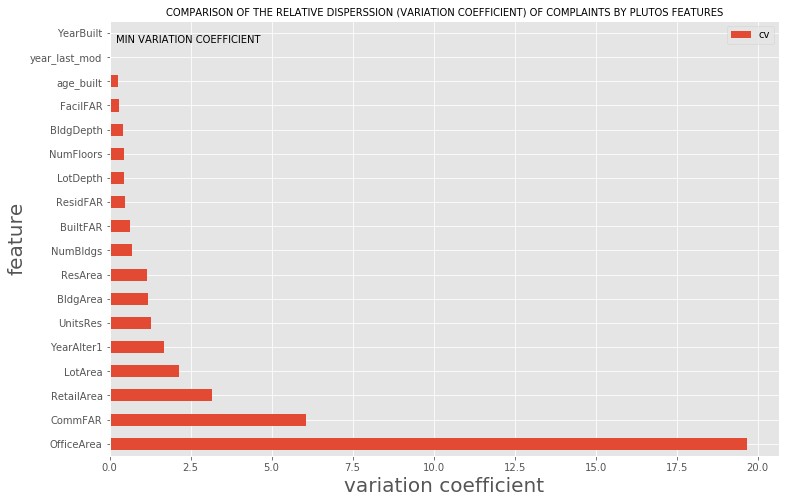

The feature with minimum cv is:
                 cv
YearBuilt  0.011094

It means than most of the complaints are distributed near and arround the mean of -YearBuilt- feature
So, there is an obvious relationship between the -YearBuilt- feature and the -HEAT/HOT WATER COMPLAINT-
Regarding with this feature, frame -summary03- shows that:
75% complaints comes from buildings builted before:  1931


In [11]:
# 1.4. Comparing the variation coefficient per each feature:

z03=z02[["cv"]]
z03.sort_values(by="cv",ascending=False).plot(kind="barh",figsize=(12,8))
plt.xlabel('variation coefficient', size=20)
plt.ylabel('feature', size=20)
plt.title("COMPARISON OF THE RELATIVE DISPERSSION (VARIATION COEFFICIENT) OF COMPLAINTS BY PLUTOS FEATURES", size=10)
plt.annotate("MIN VARIATION COEFFICIENT",
             xy=(.2,16.5),
             va="bottom",
             ha="left",
             size=10
            )

plt.show()

z04=z02.head(1)
z05=z04[["cv"]] # z01.iloc[0,0]

print("The feature with minimum cv is:")
print(z05)
print("")
print("It means than most of the complaints are distributed near and arround the mean of -YearBuilt- feature")
print("So, there is an obvious relationship between the -YearBuilt- feature and the -HEAT/HOT WATER COMPLAINT-")
print("Regarding with this feature, frame -summary03- shows that:")
print("75% complaints comes from buildings builted before: ",int(summary02.iloc[11,27]))

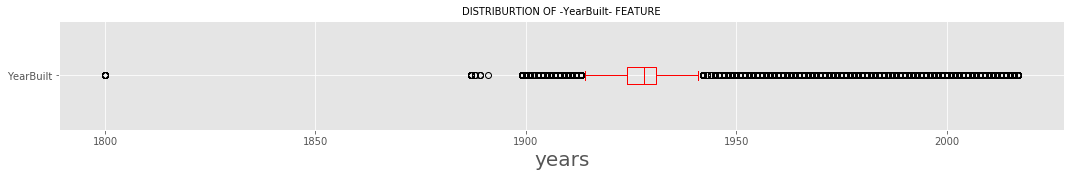

In [12]:
# 1.5 Box plot

z06=z00[["YearBuilt"]] #,"age_built","age_last_mod","NumBldgs","BuiltFAR"]]   #[["YearBuilt","NumBldgs","BuiltFAR"]]
z06.plot(kind="box",figsize=(18,2),color="red",vert=False)
plt.xlabel('years', size=20)
plt.title("DISTRIBURTION OF -YearBuilt- FEATURE", size=10)
plt.show()


# Boxplot of "YearBuilt" feature shows that:
# a. Complaints comes mainly from old buildings (with at least 87 years of antiquity)
# b. the central 50% of Those ones are concentrated among 1924 and 1931
# c. Complaints from bulidings builded during last 70 years are considered "outliers"  

In [13]:
# Data percentiles:

p75 = z00["YearBuilt"].quantile(.75)
p50 = z00["YearBuilt"].quantile(.5)
p25 = z00["YearBuilt"].quantile(.25)

print("P25= ",p25," P50= ",p50," P25= ",p25)

P25=  1924.0  P50=  1928.0  P25=  1924.0


In [15]:
# 2. LINEAR RELATIONSHIP (CORRELATION COEFF) BETWEEN THE NUMBER OF COMPLAINTS PER EACH PLUTOS DATA SET ROW AND EACH FEATURE OF THIS DATA SET.
# This analysis will be done in 2 parts:
# a. With the 75% oldest buildings (builted before 1931)
# b. With the 75% newest buildings (builted after 1924)

# 2.0. Creating in DFPLUTO the features: 
#    a. age_built = 2018-YearBuilt
#    b. year_last_mod = max(YearBuilt,YearAlter1)
#    c. age_last_mod = 2018-year_last_mod
#
DFPLUTO["age_built"]=2018-DFPLUTO.YearBuilt
DFPLUTO["year_last_mod"]=DFPLUTO[['YearBuilt','YearAlter1']].max(axis=1)
DFPLUTO["age_last_mod"]=2018-DFPLUTO.year_last_mod
DFPLUTO.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

(83372, 22)

In [16]:
DFPLUTO.head()

,Address,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,...,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,age_built,year_last_mod,age_last_mod
0,1 ALDEN PARK,132,10465.0,16500,694,694,0,0,18,1.0,...,41.0,1930,0,0.06,0.90,0.0,2.0,88,1930,88
1,1 ANGELAS PLACE,7504,10465.0,34860,60406,60406,0,0,17,2.0,...,46.5,2004,0,1.73,0.60,0.5,1.0,14,2004,14
2,1 BANES COURT,15,10473.0,2262,2420,2420,0,0,1,3.0,...,40.0,2002,0,1.07,0.60,0.0,1.0,16,2002,16
3,1 BEDFORD PARK BLVD,1,10468.0,7700,5000,0,0,5000,1,1.0,...,100.0,1928,0,0.65,6.02,0.0,6.5,90,1928,90
4,1 BLACKSTONE PLACE,966,10471.0,13344,3670,3670,0,0,1,2.0,...,35.0,1920,0,0.28,0.50,0.0,1.0,98,1920,98


In [17]:
# 2.1. Computing the number of complaints per each PLUTOs data set row

w01=pd.DataFrame(DF03["incident_address"].value_counts())
w01.reset_index(drop=False,inplace=True)
headers=["address","complaints_tot"]
w01.columns=headers
DF04=pd.merge(DFPLUTO,w01,left_on="Address",right_on="address",how="inner")
DF04_oldest=DF04[DF04["YearBuilt"]<=1931]
DF04_newest=DF04[DF04["YearBuilt"]>1924]
print("Rows number on oldest dataset: ", DF04_oldest.shape[0]," rows")
print("Rows number on newest dataset: ", DF04_newest.shape[0]," rows")

Rows number on oldest dataset:  11186  rows
Rows number on newest dataset:  10647  rows


In [18]:
# 2.1.1. Standarizing features for oldest data

DF05=DF04_oldest.drop(["Address","Lot","ZipCode","address"],axis=1,inplace=False)
DF06=np.nan_to_num(DF05)
DF07=StandardScaler().fit_transform(DF06)
DF07=pd.DataFrame(DF07)
headers=['LotArea','BldgArea','ResArea','OfficeArea','RetailArea','NumBldgs','NumFloors','UnitsRes','LotDepth',
         'BldgDepth','YearBuilt','YearAlter1','BuiltFAR','ResidFAR','CommFAR','FacilFAR','age_built','year_last_mod','age_last_mod','complaints_tot']
DF07.columns=headers
DF07.head()

,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,UnitsRes,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,age_built,year_last_mod,age_last_mod,complaints_tot
0,0.227666,-0.307696,-0.322622,-0.031823,-0.147049,6.222224,-1.601284,-0.442104,0.361728,-1.856961,1.032292,1.896828,-1.184118,-1.389690,-0.206525,-1.921110,-1.032292,1.770841,-1.770841,-0.099045
1,0.032279,-0.459543,-0.507127,-0.031823,-0.147049,1.319653,-0.611156,-0.565055,0.910350,-1.470575,0.059379,-0.526932,-1.291830,-1.186149,-0.206525,-1.279083,-0.059379,-0.478944,0.478944,-0.237266
2,0.452269,0.539197,-0.607124,-0.031823,1.853477,1.319653,-0.941199,-0.647023,0.714413,1.968261,0.545835,-0.526932,-0.510918,2.287622,5.574470,1.610039,-0.545835,-0.326931,0.326931,-0.237266
3,0.127975,1.073187,1.355248,-0.031823,-0.147049,-0.314537,1.039056,1.238227,-0.069332,0.693187,0.740418,-0.526932,1.636593,0.917111,-0.206525,0.004972,-0.740418,-0.266126,0.266126,0.689633
4,-0.097228,-0.509540,-0.567877,-0.031823,-0.147049,-0.314537,-1.601284,-0.606039,-0.069332,-0.890996,1.032292,-0.526932,-1.271634,-1.389690,-0.206525,-1.921110,-1.032292,-0.174919,0.174919,-0.221005


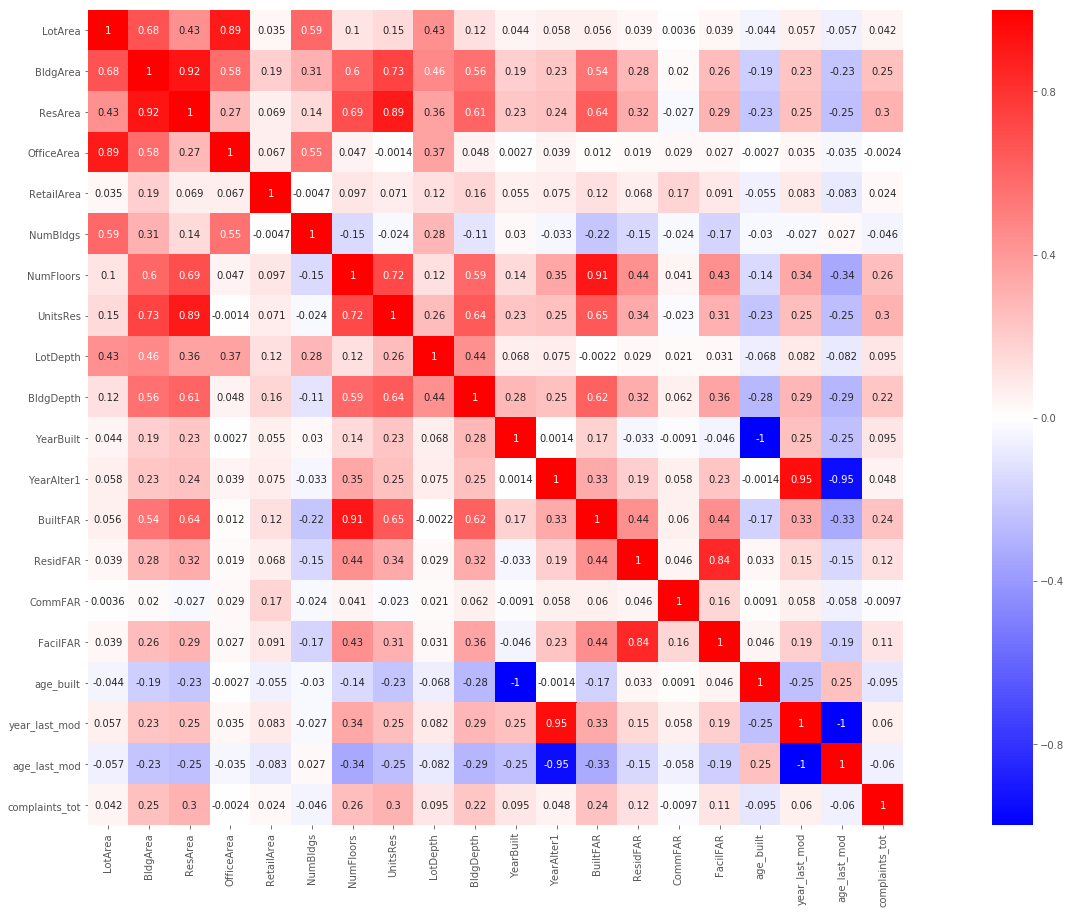

In [19]:
# 2.2. Computing general feature correlationships

import seaborn as sns
plt.figure(figsize = (32,15))
sns.heatmap(DF07.corr(), square=True, annot=True,vmin=-1, vmax=1, center=0, cmap="bwr")

In [20]:
# 2.1.1. Standarizing features for newest data

DF05_newest=DF04_newest.drop(["Address","Lot","ZipCode","address"],axis=1,inplace=False)
DF06_newest=np.nan_to_num(DF05_newest)
DF07_newest=StandardScaler().fit_transform(DF06_newest)
DF07_newest=pd.DataFrame(DF07_newest)
headers=['LotArea','BldgArea','ResArea','OfficeArea','RetailArea','NumBldgs','NumFloors','UnitsRes','LotDepth',
         'BldgDepth','YearBuilt','YearAlter1','BuiltFAR','ResidFAR','CommFAR','FacilFAR','age_built','year_last_mod','age_last_mod','complaints_tot']
DF07_newest.columns=headers
DF07_newest.head()

,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,UnitsRes,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,age_built,year_last_mod,age_last_mod,complaints_tot
0,0.077851,-0.254367,-0.241861,-0.039728,-0.137109,3.281416,-1.128629,-0.250378,0.087618,-1.321649,-0.714480,2.495751,-0.554824,-1.181770,-0.165551,-1.600376,0.714480,1.100796,-1.100796,-0.088887
1,0.081309,0.550411,0.650003,-0.039728,0.586892,-0.176689,1.067823,0.753119,0.087618,0.961712,-0.338491,-0.400062,0.749774,2.539731,-0.165551,1.801873,0.338491,-0.562789,0.562789,0.089251
2,0.221568,0.125984,-0.364265,-0.039728,1.638141,0.687837,-0.689339,-0.326401,0.277671,1.504010,-0.885383,-0.400062,-0.216845,2.539731,6.533454,1.801873,0.885383,-1.065003,1.065003,-0.220554
3,0.055371,0.733102,0.875232,-0.039728,0.384172,-0.176689,1.067823,0.449029,-0.017967,0.819002,-0.338491,-0.400062,1.243223,2.539731,-0.165551,1.801873,0.338491,-0.562789,0.562789,0.561704
4,0.014061,0.365807,0.480030,-0.039728,-0.137109,-0.176689,0.628532,0.373007,-0.144669,0.562123,-0.817022,-0.400062,0.861307,1.152751,-0.165551,0.255396,0.817022,-1.002226,1.002226,0.662391


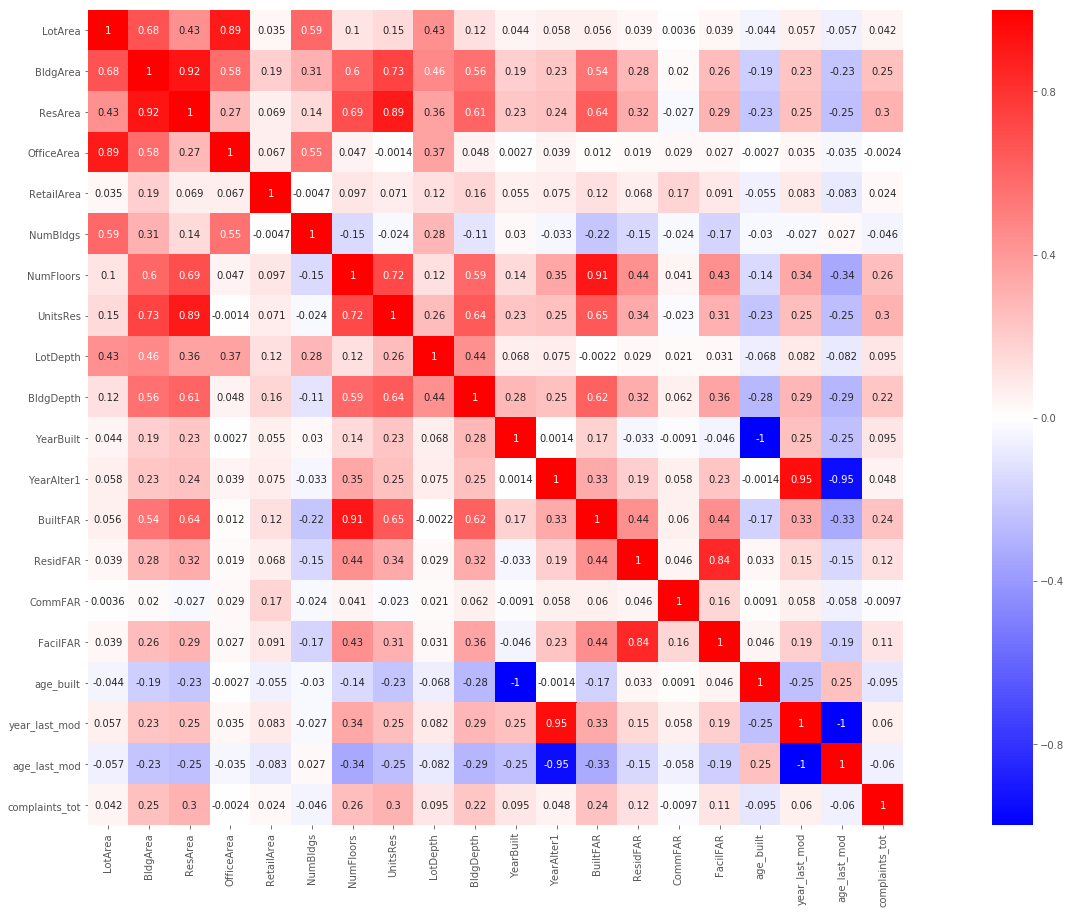

In [21]:
plt.figure(figsize = (32,15))
sns.heatmap(DF07.corr(), square=True, annot=True,vmin=-1, vmax=1, center=0, cmap="bwr")

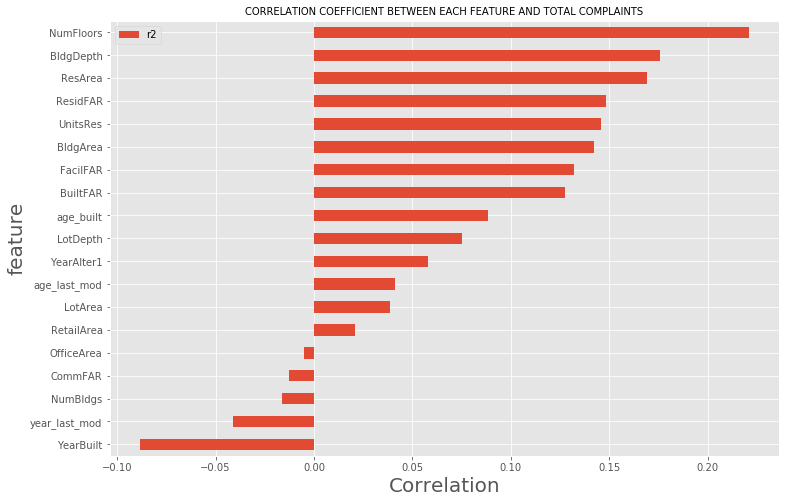

The top 5 features with major complaints linear relationship are:
                 r2
features           
NumFloors  0.220759
BldgDepth  0.175727
ResArea    0.168947
ResidFAR   0.148167
UnitsRes   0.145490
Usually, correlations under -+0.70 are considered as signal of low or weak linear relationship
Features 'age_built','year_last_mod','age_last_mod', defined to check a possible relationship between
'complaints', 'antiquity' and modifications on the buildings, didn´t show a individual relevant linear relationship


In [22]:
# 2.3. Detail Complains_tot correlations in newest buildings data

feature=['LotArea','BldgArea','ResArea','OfficeArea','RetailArea','NumBldgs','NumFloors','UnitsRes','LotDepth',
         'BldgDepth','YearBuilt','YearAlter1','BuiltFAR','ResidFAR','CommFAR','FacilFAR',
         'age_built','year_last_mod','age_last_mod','complaints_tot']

w02=np.array(DF07_newest[['LotArea','BldgArea','ResArea','OfficeArea','RetailArea','NumBldgs','NumFloors','UnitsRes','LotDepth',
                  'BldgDepth','YearBuilt','YearAlter1','BuiltFAR','ResidFAR','CommFAR','FacilFAR',
                  'age_built','year_last_mod','age_last_mod','complaints_tot']])
#w02
w03=np.corrcoef(w02.transpose())
w03[19,:] #.shape #[17,:] #.transpose()
w04=pd.DataFrame(w03[19,:])
w05={"features":feature,"r2":w03[19,:]}
w06=pd.DataFrame(w05)
w07=w06.set_index("features",drop=True,inplace=False)
w08=w07.drop(["complaints_tot"],axis=0,inplace=False)
w09=w08.sort_values(by="r2",ascending=True)
w09.plot(kind="barh",figsize=(12,8))
plt.xlabel('Correlation', size=20)
plt.ylabel('feature', size=20)
plt.title("CORRELATION COEFFICIENT BETWEEN EACH FEATURE AND TOTAL COMPLAINTS", size=10)
plt.annotate("TOP CORR",
             xy=(-.15,18),
             va="bottom",
             ha="left",
             size=10
            )

plt.show()
print("The top 5 features with major complaints linear relationship are:")
print(w09.tail().sort_values(by="r2",ascending=False))
print("Usually, correlations under -+0.70 are considered as signal of low or weak linear relationship")
print("Features 'age_built','year_last_mod','age_last_mod', defined to check a possible relationship between")
print("'complaints', 'antiquity' and modifications on the buildings, didn´t show a individual relevant linear relationship")

In [ ]:
# CONCLUSION:

# "HEAT/HOT WATER" complaints in the Bronx Borough have an obvious relationship with the characteristics related to the antiquity of buildings

# This conclusion is based on the fact than  "HEAT/HOT WATER" complaints in the Bronx Borough have an obvious relationship with the feature "YearBuilt"
# as far as 75% complaints comes from buildings builted before:  1931.

# Additionally, correlation analysis suggest a weak individual linear relationship between the PLUTOs features selected for analysis and the number of complaints 
# per house ("complaints_tot" feature) (correlations under -+0.25).